In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

#Read trainig and testing files
train = pd.read_csv("C:/Users/tarun/Desktop/machine/TheDataSupermacy/train_jqd04QH.csv")
test = pd.read_csv("C:/Users/tarun/Desktop/machine/TheDataSupermacy/test_GYi4Gz5.csv")

#Identify the datatype of variables
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
train_df = pd.read_csv('C:/Users/tarun/Desktop/machine/TheDataSupermacy/train_jqd04QH.csv') # load train dataset
test_df = pd.read_csv('C:/Users/tarun/Desktop/machine/TheDataSupermacy/test_GYi4Gz5.csv') # load test dataset

In [7]:
# glimps of train data
train_df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1
7,24127,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,<10,Pvt Ltd,>4,8,0
8,7615,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,10,0
9,9676,city_97,0.925,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,85,0


In [8]:
print("######## Train dataset info ########")
train_df.info()
print("\n######## Test dataset info ########")
test_df.info()

######## Train dataset info ########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB

######## Test dataset info ########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data col

In [9]:
def plot_num_of_record(kwargs):
    n_rows_data = []
    n_cols_data = []
    names = []
    n_rows_data_norm = []
    
    for name, df in kwargs.items():
        n_rows_data.append(df.shape[0])
        n_cols_data.append(df.shape[1])
        names.append(name)
    
    if len(names)!=0:
        for i in n_rows_data:
            n_rows_data_norm.append(round((i/sum(n_rows_data))*100, 2))
        
        fig, axs = plt.subplots(ncols=2, figsize=(8,6))
        fig.suptitle("Number of records In files")
        ax_rows = sns.barplot(names, n_rows_data, ax=axs[0])
        ax_rows.set(xlabel='Files', ylabel='Number of Rows')
        for n, da in enumerate(zip(names, n_rows_data)):
            if da[1]!=0:
                ax_rows.text(n, da[1], str(da[1]) + ",  " + str(n_rows_data_norm[n]) + " %", ha='center')
                
        ax_cols = sns.barplot(names, n_cols_data, ax=axs[1])
        ax_cols.set(xlabel='Files', ylabel='Number of Columns')
        for n, da in enumerate(zip(names, n_cols_data)):
            if da[1]!=0:
                ax_cols.text(n, da[1], da[1], va='center')
    else:
        print("no files are passed")

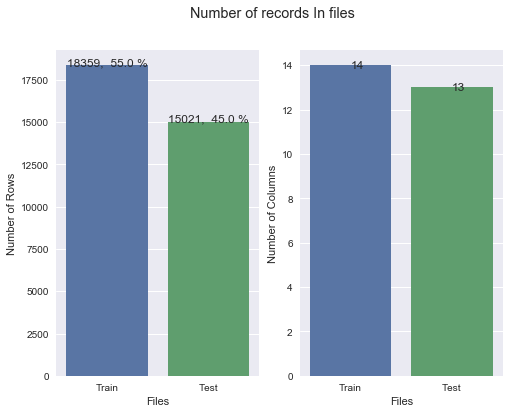

In [10]:
plot_num_of_record({'Train': train_df, 'Test': test_df})

In [11]:
def plot_nan(data, title, figsize):
    num_records = data.shape[0]
    cols = data.isnull().sum().index.values
    nans = data.isnull().sum().values.astype('int')
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(nans, cols, ax=ax)
    ax.set(xlabel='Number of NaNs', ylabel='Columns')
    ax.set_title(title)
    for n, da in enumerate(zip(cols, nans)):
        if da[1]!=0:
            ax.text(da[1], n, str(da[1]) + ", " + str(round(100*(da[1]/num_records), 2)) + " %", va='center', fontsize=10)

In [12]:

from IPython.display import HTML, display, clear_output

In [13]:
def train_test_data_check(train_df, test_df, cols=None, use_all_cols=True):
    if cols == None:
        if use_all_cols:
            train_cols = set(train_df.columns)
            test_cols = set(test_df.columns)
            cols = train_cols.intersection(test_cols)
        else:
            train_cols = set(train_df.select_dtypes(['object', 'category']).columns)
            test_cols = set(test_df.select_dtypes(['object', 'category']).columns)
            cols = train_cols.intersection(test_cols)
        
    for i, col in enumerate(cols):
        display(HTML('<h3><font id="'+ col + '-ttdc' + '" color="blue">' + str(i+1) + ') ' + col + '</font></h3>'))
        print("Datatype : " + str(train_df[col].dtype) )
        print(str(train_df[col].dropna().nunique()) + " unique " + col  + " in Train dataset")
        print(str(test_df[col].dropna().nunique()) + " unique " + col  + " in Test dataset")
        extra = len(set(test_df[col].dropna().unique()) - set(train_df[col].dropna().unique()))
        print(str(extra) + " extra " + col + " in Test dataset")
        if extra == 0:
            display(HTML('<h5><font color="green"> All values present in Test dataset also present in Train dataset for column ' + col + '</font></h5>'))
        else:
            display(HTML('<h5><font color="green">' + str(extra) + ' ' +  col + ' are not present in Train dataset which are in Test dataset</font></h5>'))

In [14]:
train_test_data_check(train_df, test_df)

Datatype : object
2 unique relevent_experience in Train dataset
2 unique relevent_experience in Test dataset
0 extra relevent_experience in Test dataset


Datatype : object
8 unique company_size in Train dataset
8 unique company_size in Test dataset
0 extra company_size in Test dataset


Datatype : int64
18359 unique enrollee_id in Train dataset
15021 unique enrollee_id in Test dataset
15021 extra enrollee_id in Test dataset


Datatype : object
6 unique company_type in Train dataset
6 unique company_type in Test dataset
0 extra company_type in Test dataset


Datatype : object
3 unique gender in Train dataset
3 unique gender in Test dataset
0 extra gender in Test dataset


Datatype : float64
93 unique city_development_index in Train dataset
93 unique city_development_index in Test dataset
0 extra city_development_index in Test dataset


Datatype : object
3 unique enrolled_university in Train dataset
3 unique enrolled_university in Test dataset
0 extra enrolled_university in Test dataset


Datatype : object
6 unique major_discipline in Train dataset
6 unique major_discipline in Test dataset
0 extra major_discipline in Test dataset


Datatype : object
123 unique city in Train dataset
123 unique city in Test dataset
0 extra city in Test dataset


Datatype : object
22 unique experience in Train dataset
22 unique experience in Test dataset
0 extra experience in Test dataset


Datatype : object
5 unique education_level in Train dataset
5 unique education_level in Test dataset
0 extra education_level in Test dataset


Datatype : object
6 unique last_new_job in Train dataset
6 unique last_new_job in Test dataset
0 extra last_new_job in Test dataset


Datatype : int64
241 unique training_hours in Train dataset
241 unique training_hours in Test dataset
0 extra training_hours in Test dataset


In [15]:
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')


In [16]:
def count_plot_by_hue(data_se, hue_se, title, figsize, sort_by_counts=False):
    if sort_by_counts == False:
        order = data_se.unique()
        order.sort()
    else:
        order = data_se.value_counts().index.values
    off_hue = hue_se.nunique()
    off = len(order)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(y=data_se, hue=hue_se, order=order, ax=ax)
    ax.set_title(title)
    patches = ax.patches
    for i, p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[1,0]
        y=p.get_bbox().get_points()[:,1]
        total = x
        p = i
        q = i
        while(q < (off_hue*off)):
            p = p - off
            if p >= 0:
                total = total + (patches[p].get_bbox().get_points()[1,0] if not np.isnan(patches[p].get_bbox().get_points()[1,0]) else 0)
            else:
                q = q + off
                if q < (off*off_hue):
                    total = total + (patches[q].get_bbox().get_points()[1,0] if not np.isnan(patches[q].get_bbox().get_points()[1,0]) else 0)
       
        perc = str(round(100*(x/total), 2)) + " %"
        
        if not np.isnan(x):
            ax.text(x, y.mean(), str(int(x)) + ",  " + perc, va='center')
    plt.show()

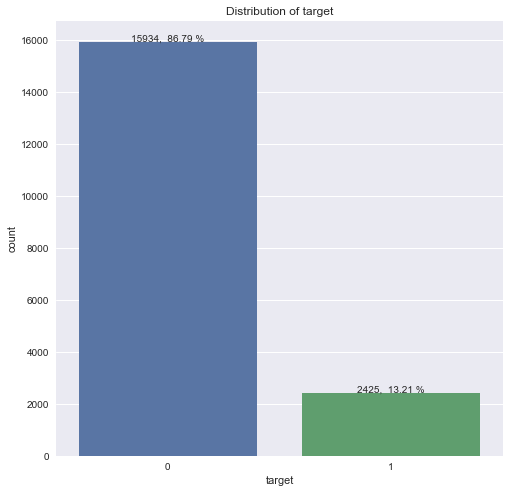

In [17]:
plot_bar_counts_categorical(train_df['target'], 'target', (8,8))

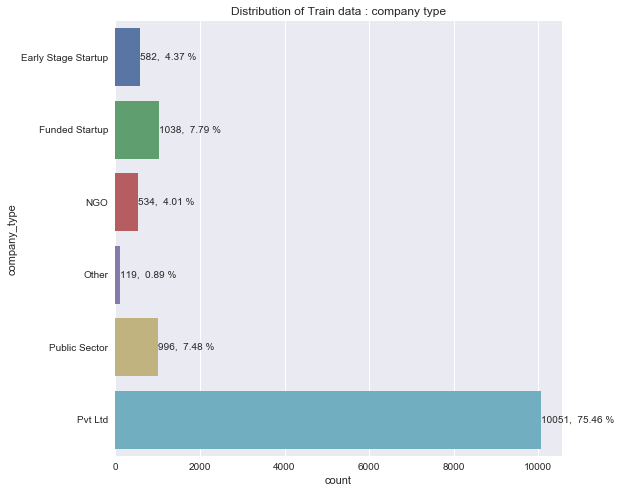

In [18]:
plot_bar_counts_categorical(train_df['company_type'], 'Train data : company type', (8,8))

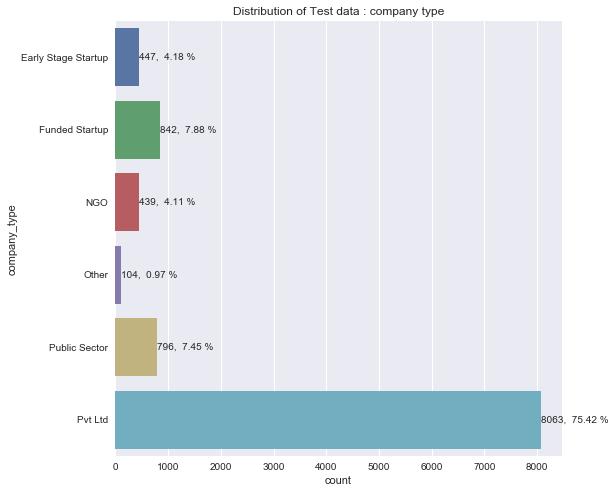

In [19]:
plot_bar_counts_categorical(test_df['company_type'], 'Test data : company type', (8,8))

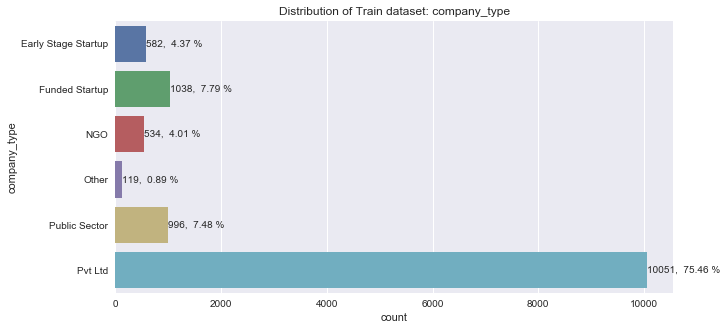

In [21]:
plot_bar_counts_categorical(train_df['company_type'], 'Train dataset: company_type', (10,5))

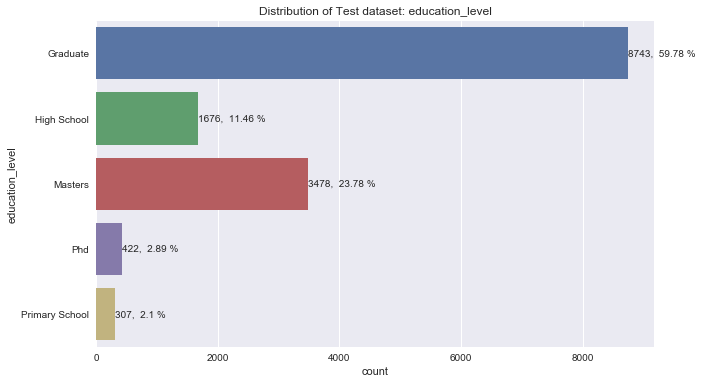

In [22]:
plot_bar_counts_categorical(test_df['education_level'], 'Test dataset: education_level', (10,6))

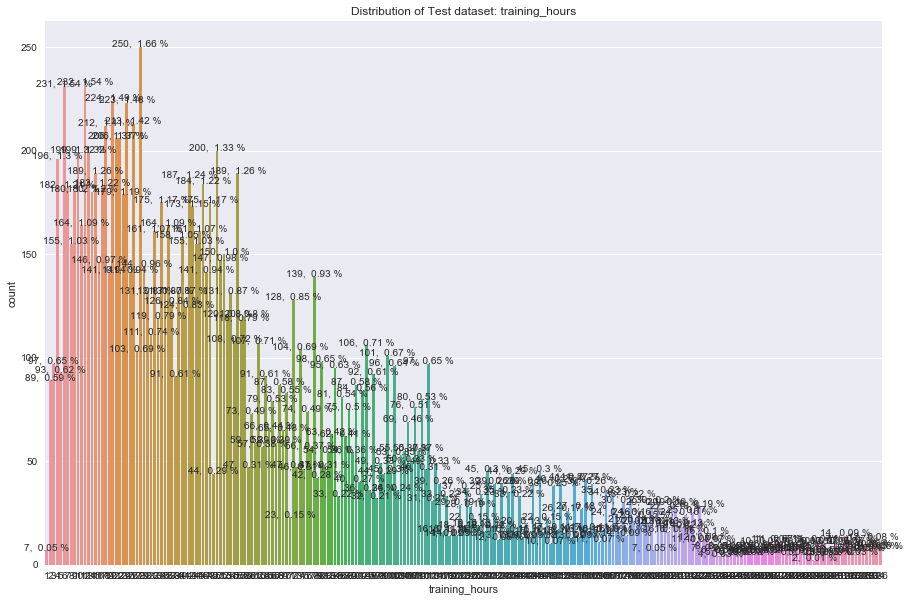

In [23]:
plot_bar_counts_categorical(test_df['training_hours'], 'Test dataset: training_hours', (15,10))

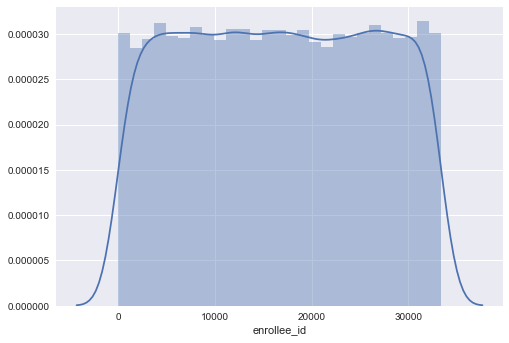

In [24]:
sns.distplot(train_df['enrollee_id'])
plt.show()

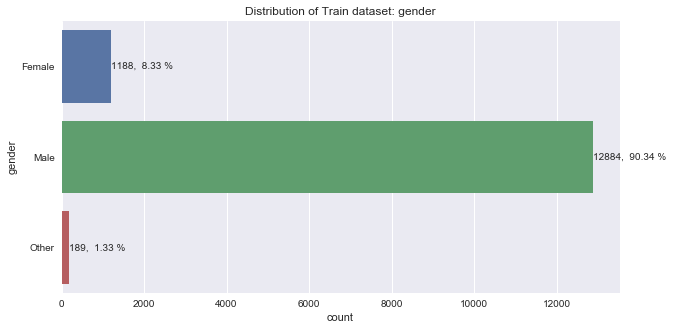

In [25]:
plot_bar_counts_categorical(train_df['gender'], 'Train dataset: gender', (10,5))

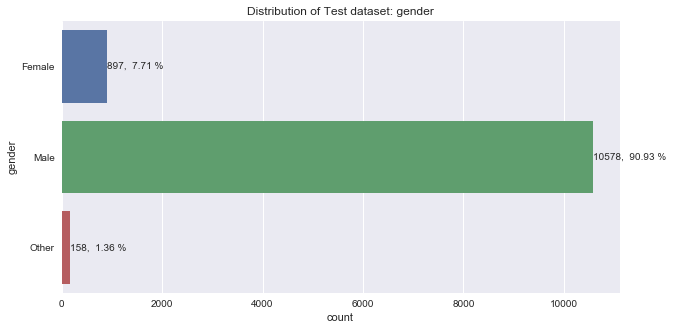

In [26]:
plot_bar_counts_categorical(test_df['gender'], 'Test dataset: gender', (10,5))

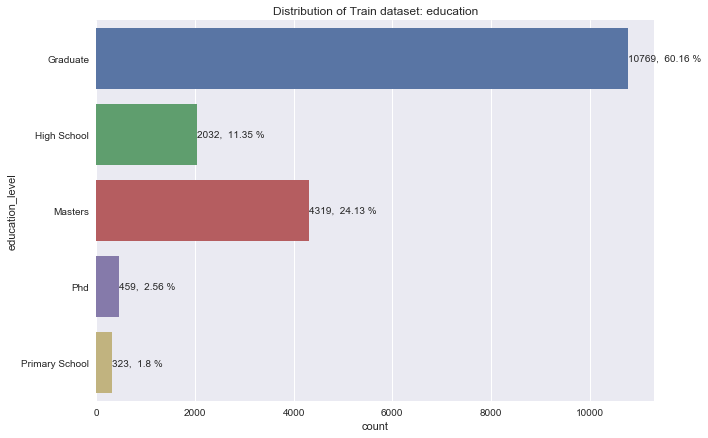

In [27]:
plot_bar_counts_categorical(train_df['education_level'], 'Train dataset: education', (10, 7))

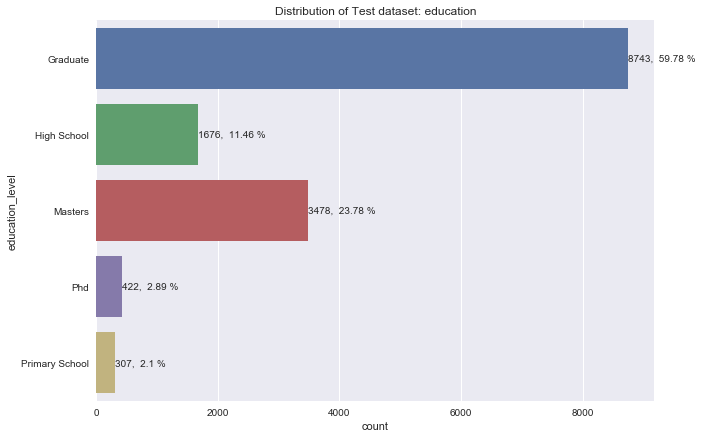

In [28]:
plot_bar_counts_categorical(test_df['education_level'], 'Test dataset: education', (10,7))

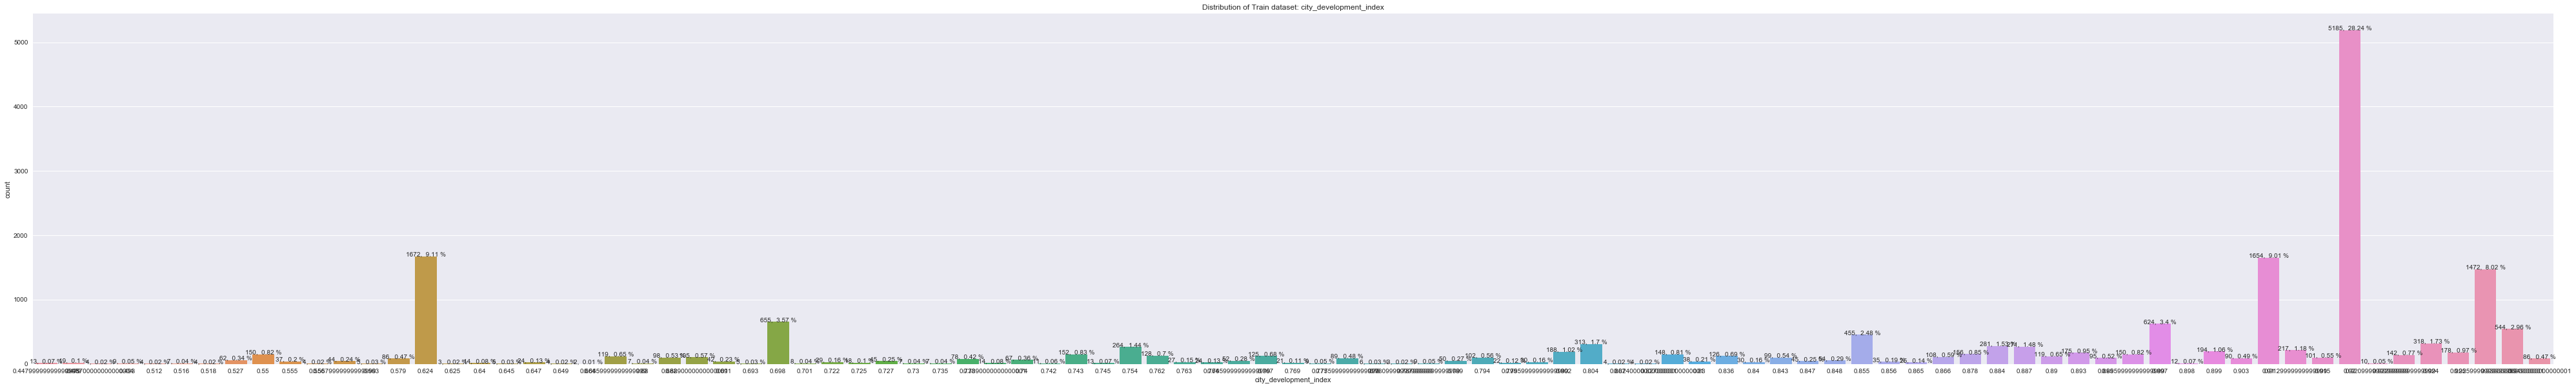

In [32]:
plot_bar_counts_categorical(train_df['city_development_index'], 'Train dataset: city_development_index', (70, 10))

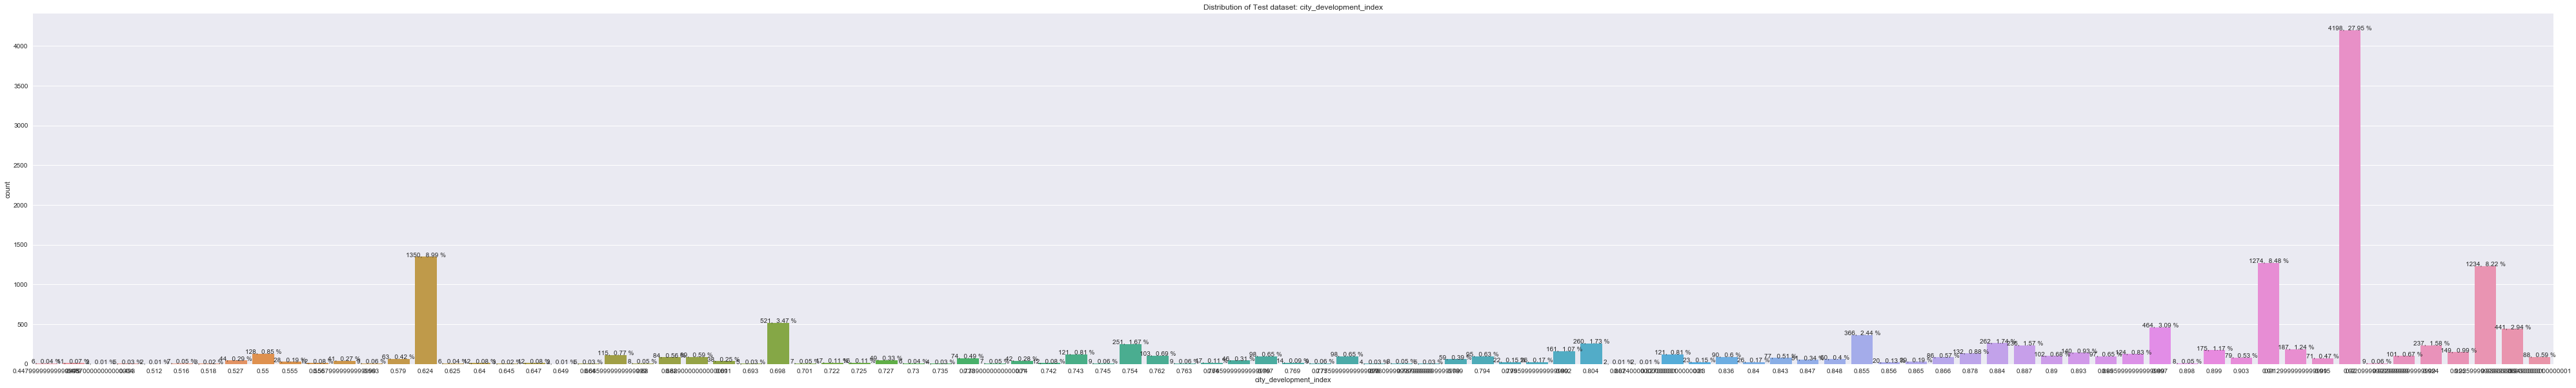

In [33]:
plot_bar_counts_categorical(test_df['city_development_index'], 'Test dataset: city_development_index', (70,10))

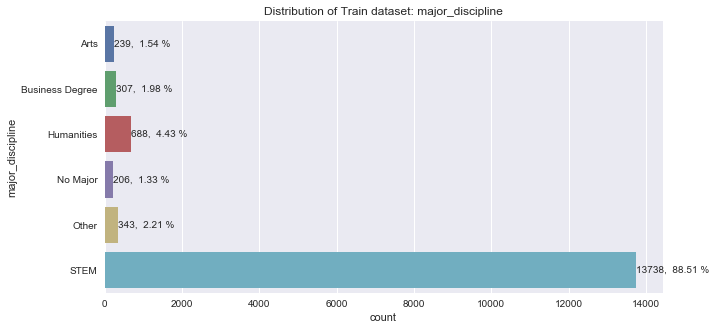

In [34]:
plot_bar_counts_categorical(train_df['major_discipline'], 'Train dataset: major_discipline', (10,5))

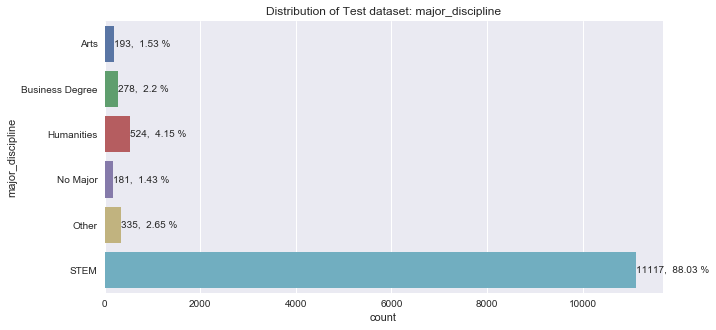

In [35]:
plot_bar_counts_categorical(test_df['major_discipline'], 'Test dataset: major_discipline', (10,5))

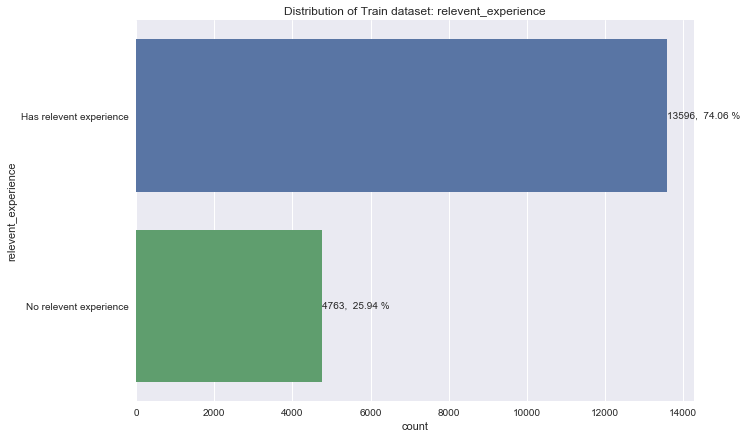

In [39]:
plot_bar_counts_categorical(train_df['relevent_experience'], 'Train dataset: relevent_experience', (10,7))

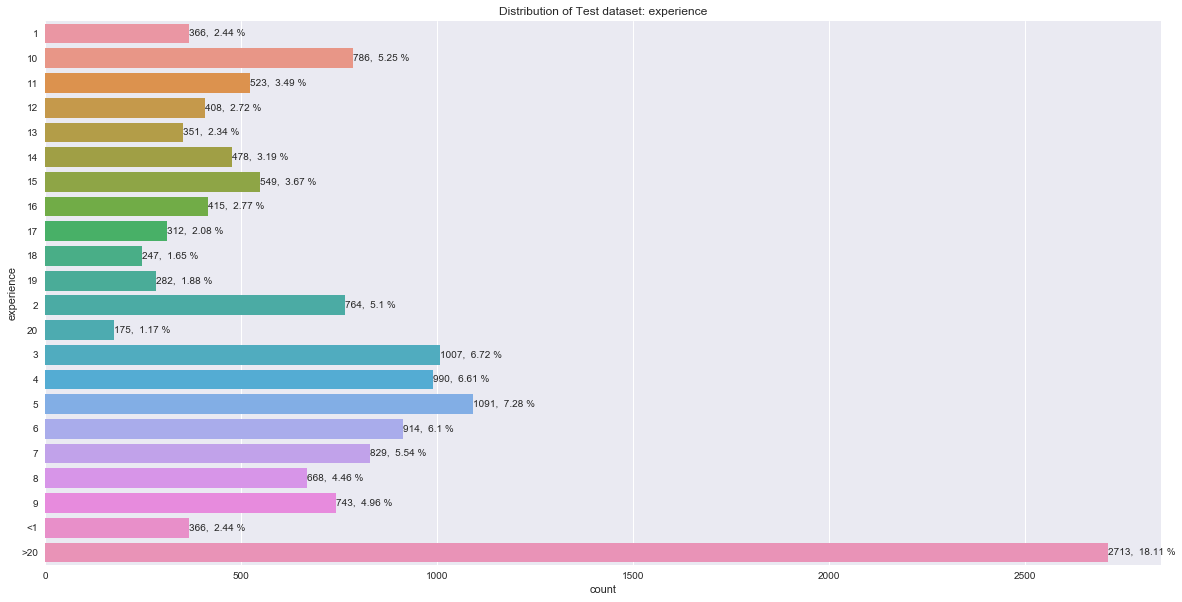

In [40]:
plot_bar_counts_categorical(test_df['experience'], 'Test dataset: experience', (20,10))

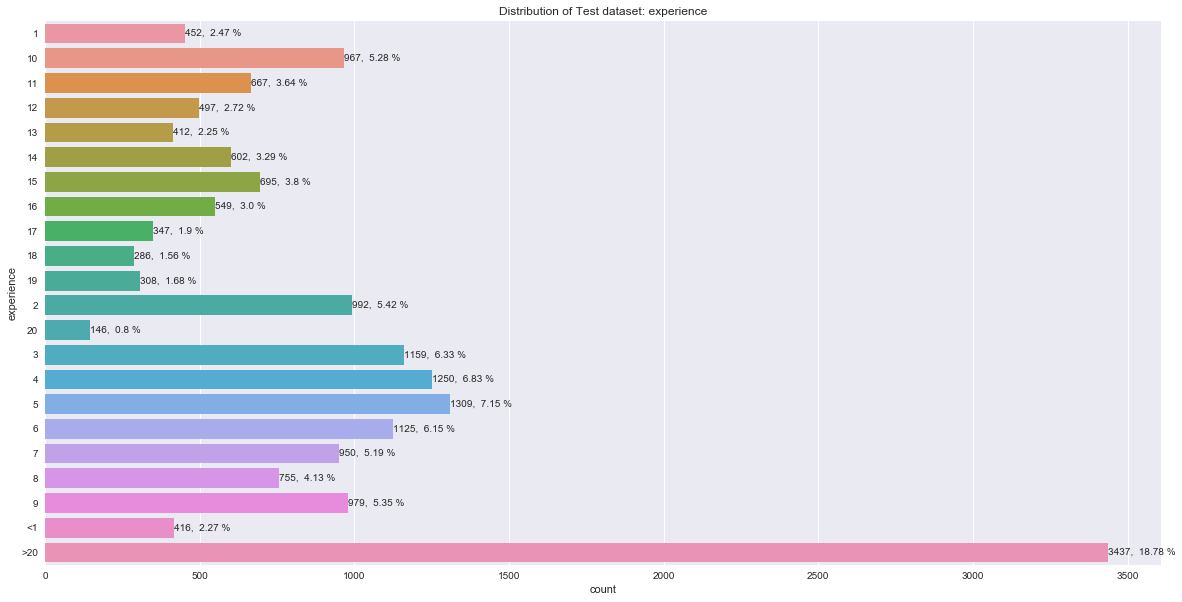

In [41]:
plot_bar_counts_categorical(train_df['experience'], 'Test dataset: experience', (20,10))

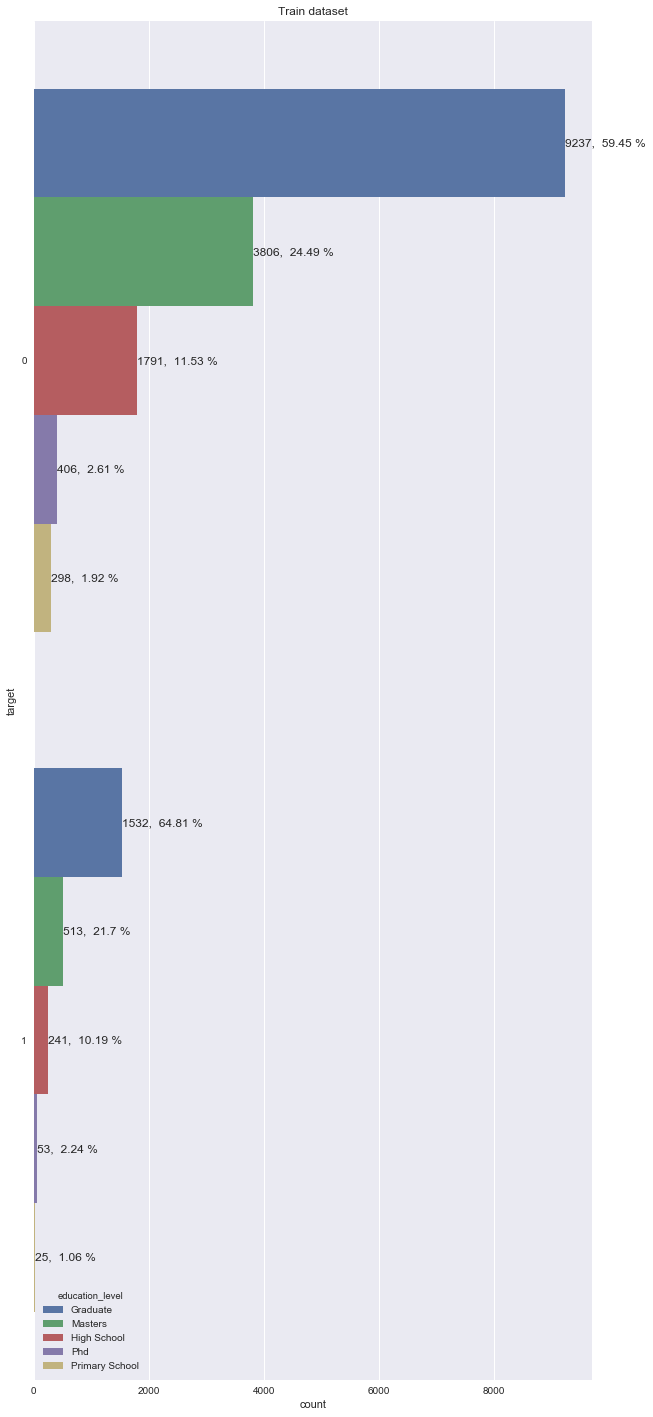

In [45]:
count_plot_by_hue(train_df['target'], train_df['education_level'], 'Train dataset', (10,25))

In [ ]:
count_plot_by_hue(train_df['enrollee_id'], train_df['target'], 'Train dataset', (10,200))